## Завдання:

Класифiкацiя на основі багатошарового персептрона.

&nbsp;

Початковi данi:

(a) from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60 , random_state=0)

rng = np.random.RandomState(13)

X_stretched = np.dot(X, rng.randn(2, 2))

(б) import numpy as np

np.random.seed(0)

X = np.random.randn(300, 2)

Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

## Виконання завдання

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import metrics

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

### Набір даних (а)

In [4]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

Візуалізація даних

In [5]:
np.unique(y_true)

array([0, 1, 2, 3])

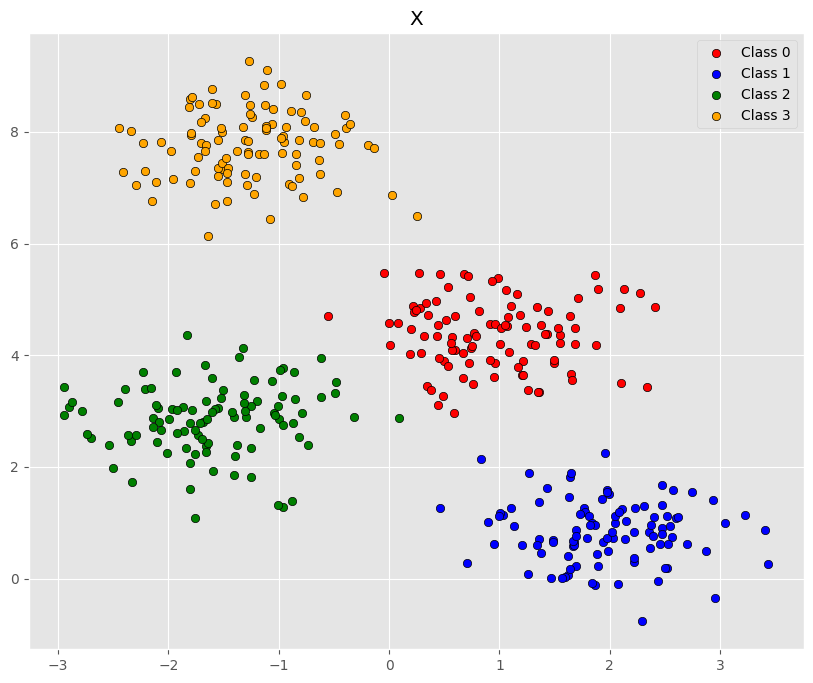

In [6]:
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("X")
plt.show()

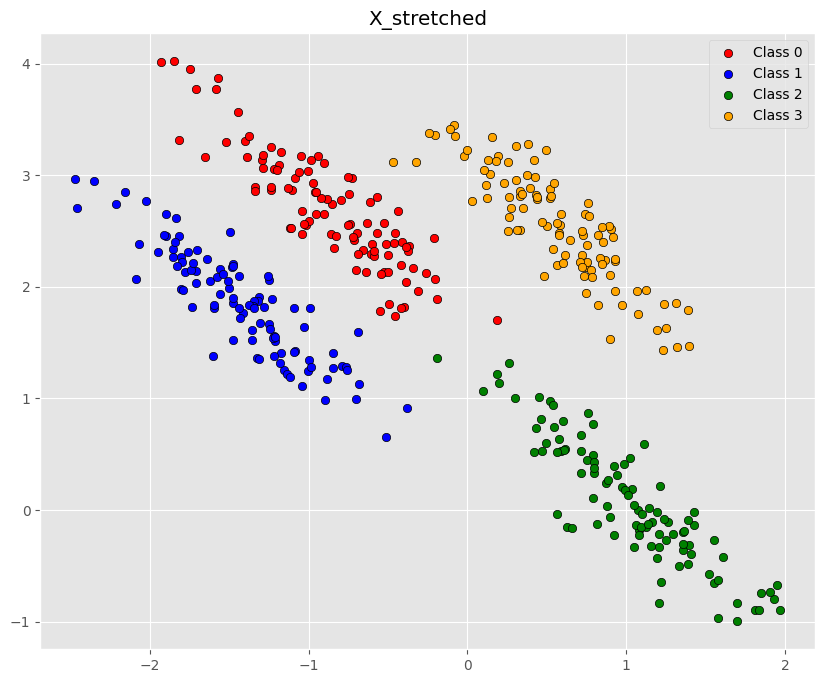

In [7]:
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("X_stretched")
plt.show()

Розбиття даних на навчальний та тестовий набори

In [8]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, y_true, test_size=0.2)
train_data_stretched, test_data_stretched, train_labels_stretched, test_labels_stretched = model_selection.train_test_split(X_stretched, y_true, test_size=0.2)

In [9]:
train_data.shape

(320, 2)

In [10]:
test_data.shape

(80, 2)

In [11]:
train_labels.shape

(320,)

In [12]:
test_labels.shape

(80,)

Побудова моделі 1 для даних Х з пошуком оптимального hidden_layer_sizes

In [13]:
i = 1
model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
model.fit(train_data, train_labels)
while i <= 100 and model.score(test_data, test_labels) < 0.9:
    model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
    model.fit(train_data, train_labels)
    i += 1

In [14]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 7,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [15]:
model.predict(test_data)

array([2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 3, 0, 1, 0, 1, 3, 0, 2, 0, 0, 2, 0,
       1, 1, 3, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 3, 2, 3, 1, 0, 1, 1, 0,
       0, 1, 0, 3, 2, 1, 0, 2, 1, 1, 2, 2, 3, 1, 3, 1, 3, 3, 1, 2, 0, 3,
       0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 0, 2, 3, 3])

In [16]:
test_labels

array([2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 3, 0, 1, 0, 1, 3, 0, 2, 0, 0, 2, 0,
       1, 1, 3, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 3, 2, 3, 1, 0, 1, 1, 0,
       0, 1, 0, 3, 2, 1, 0, 2, 1, 1, 2, 2, 3, 1, 3, 1, 0, 3, 1, 2, 0, 3,
       0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 0, 2, 2, 3])

In [17]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 78 прикладів з 80


Перенавчання відсутнє

Імовірності потрапляння в кожен з класів:

In [18]:
model.predict_proba(test_data)

array([[5.33770428e-02, 6.55294936e-03, 5.14613887e-01, 4.25456121e-01],
       [5.70485724e-02, 8.85337091e-03, 5.58140670e-01, 3.75957387e-01],
       [3.80642912e-02, 5.37229421e-03, 6.52815112e-01, 3.03748302e-01],
       [5.93566327e-01, 1.72296631e-02, 7.06786529e-02, 3.18525357e-01],
       [9.22654294e-02, 2.00534125e-02, 4.95206112e-01, 3.92475046e-01],
       [1.39581429e-01, 8.50715897e-01, 4.46234352e-03, 5.24033072e-03],
       [6.14963418e-02, 9.37590761e-01, 3.95417774e-04, 5.17479558e-04],
       [4.62105838e-02, 7.64596808e-03, 6.36645560e-01, 3.09497888e-01],
       [2.44657355e-02, 9.74589943e-01, 4.89430477e-04, 4.54891488e-04],
       [4.97362860e-02, 7.50108575e-03, 5.93480298e-01, 3.49282330e-01],
       [1.62909905e-01, 6.63923011e-04, 8.35229415e-02, 7.52903231e-01],
       [6.25051097e-01, 3.68037809e-01, 1.64914783e-03, 5.26194634e-03],
       [8.55201451e-02, 9.11723588e-01, 1.25697362e-03, 1.49929319e-03],
       [9.41844574e-01, 4.00361633e-02, 2.33668556e

Границі рішень:

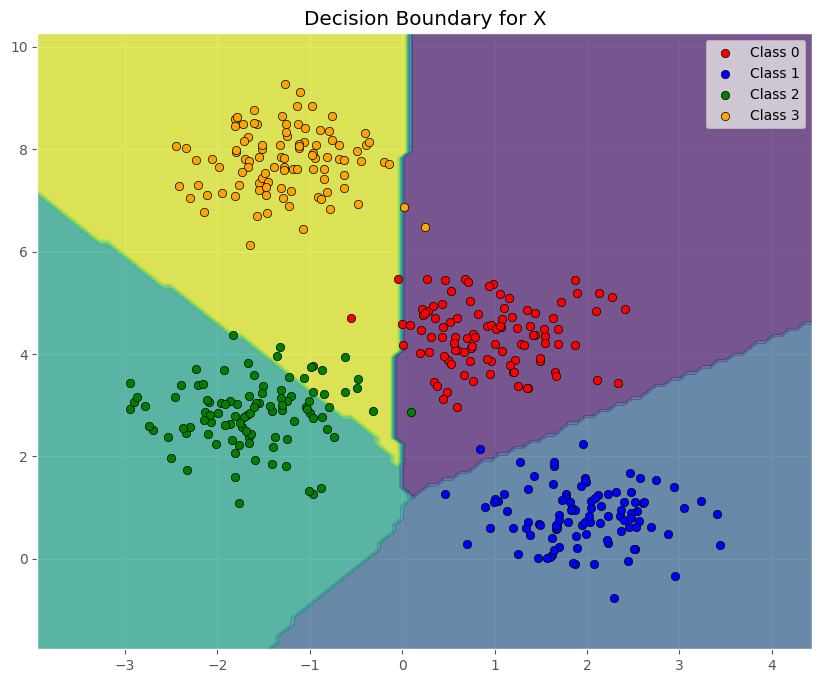

In [19]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X")
plt.show()

Розрахунок критеріїв якості:

In [20]:
metrics.confusion_matrix(test_labels, model.predict(test_data))

array([[24,  0,  0,  1],
       [ 0, 24,  0,  0],
       [ 0,  0, 17,  1],
       [ 0,  0,  0, 13]])

In [21]:
metrics.precision_score(test_labels, model.predict(test_data), average=None)

array([1.        , 1.        , 1.        , 0.86666667])

In [22]:
metrics.recall_score(test_labels, model.predict(test_data), average=None)

array([0.96      , 1.        , 0.94444444, 1.        ])

In [23]:
metrics.f1_score(test_labels, model.predict(test_data), average=None)

array([0.97959184, 1.        , 0.97142857, 0.92857143])

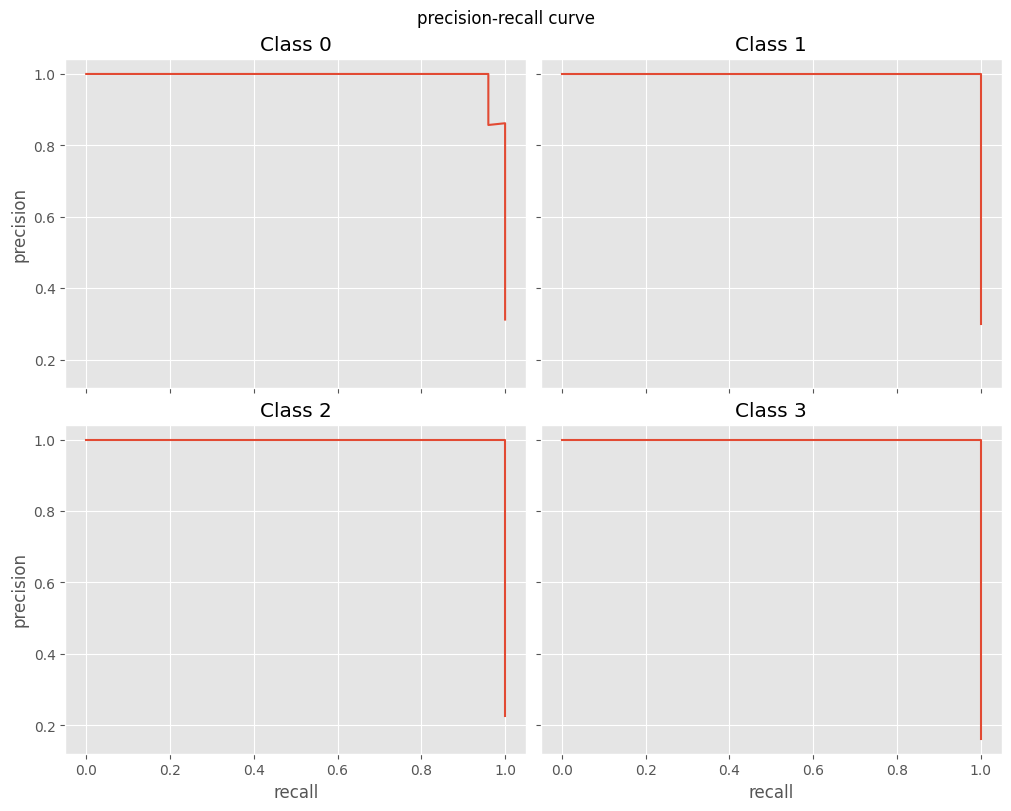

In [24]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 0, model.predict_proba(test_data)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 1, model.predict_proba(test_data)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 2, model.predict_proba(test_data)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 3, model.predict_proba(test_data)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

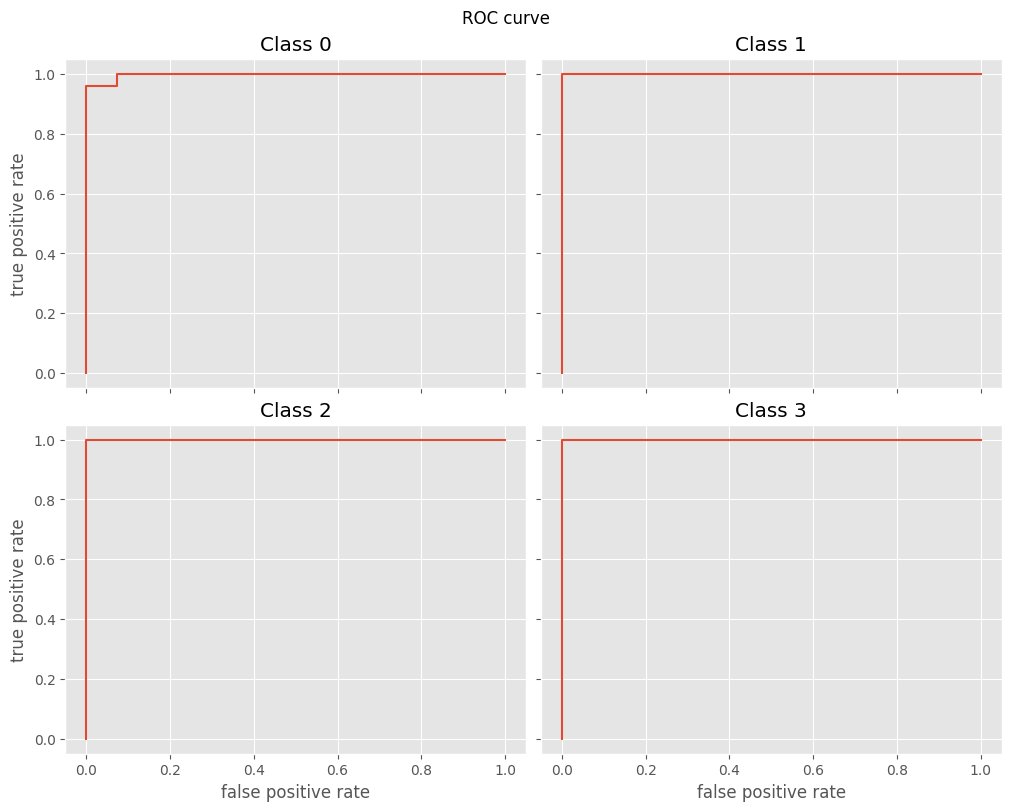

In [25]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 0, model.predict_proba(test_data)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 1, model.predict_proba(test_data)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 2, model.predict_proba(test_data)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 3, model.predict_proba(test_data)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [26]:
metrics.roc_auc_score(test_labels, model.predict_proba(test_data), multi_class='ovr', average=None)

array([0.99709091, 1.        , 1.        , 1.        ])

Решітчастий пошук для підбору гіперпараметрів:

In [27]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001), 'activation': ("identity", "logistic", "tanh", "relu"), 'solver': ("lbfgs", "sgd", "adam")}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data, train_labels)
grid_search.best_estimator_

MLPClassifier(activation='identity', alpha=0.1, hidden_layer_sizes=7,
              solver='lbfgs')

Навчання моделі на підмножині навчальних даних

In [28]:
model.fit(train_data[:20], train_labels[:20])
model.predict(test_data)

array([2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 3, 0, 1, 0, 1, 3, 0, 2, 3, 0, 2, 0,
       1, 1, 3, 0, 3, 1, 1, 1, 3, 1, 0, 3, 1, 0, 3, 2, 3, 1, 3, 1, 1, 0,
       3, 1, 0, 3, 2, 1, 0, 2, 1, 1, 2, 2, 3, 1, 3, 1, 3, 3, 1, 2, 0, 3,
       3, 3, 3, 3, 1, 2, 0, 1, 2, 3, 3, 2, 3, 3])

In [29]:
test_labels

array([2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 3, 0, 1, 0, 1, 3, 0, 2, 0, 0, 2, 0,
       1, 1, 3, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 3, 2, 3, 1, 0, 1, 1, 0,
       0, 1, 0, 3, 2, 1, 0, 2, 1, 1, 2, 2, 3, 1, 3, 1, 0, 3, 1, 2, 0, 3,
       0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 0, 2, 2, 3])

In [30]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 67 прикладів з 80


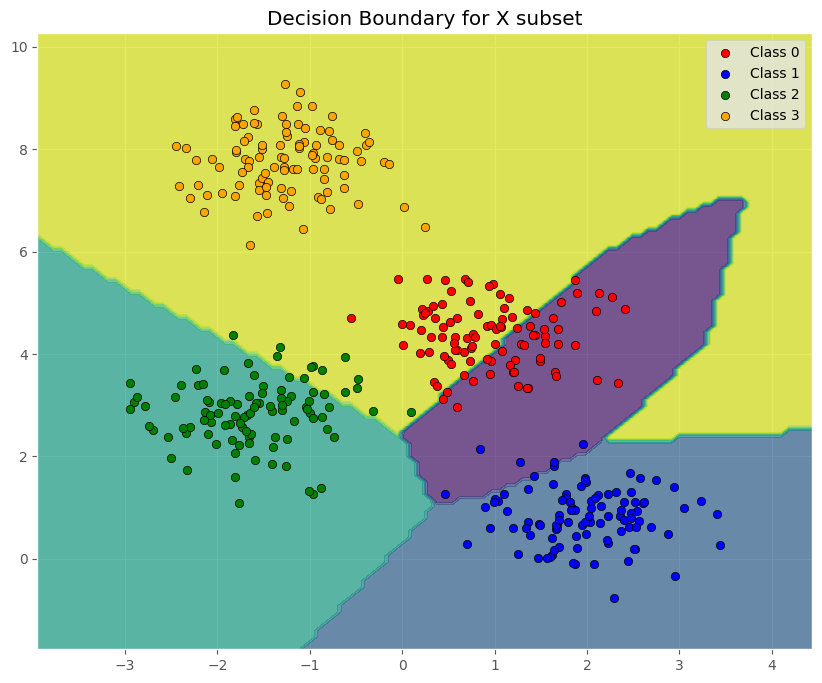

In [31]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X subset")
plt.show()

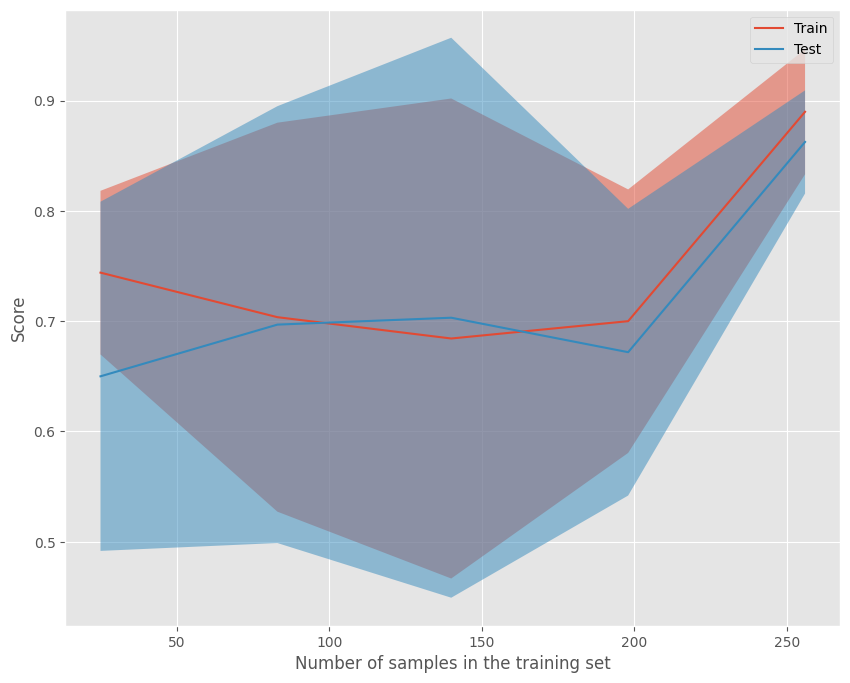

In [32]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data, train_labels)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є досить гарною моделлю. 

Побудова моделі 2 для даних Х_stretched з таким же hidden_layer_sizes

In [33]:
i -= 1
model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd") 
model.fit(train_data_stretched, train_labels_stretched)

MLPClassifier(hidden_layer_sizes=7, solver='sgd')

In [34]:
model.predict(test_data_stretched)

array([1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 3, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1])

In [35]:
test_labels_stretched

array([0, 1, 2, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2, 3, 0, 1, 1, 2, 3, 3, 2, 0,
       3, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2,
       2, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 1, 3, 0, 1, 2, 1, 0, 3, 0, 0, 0,
       1, 2, 2, 0, 1, 1, 1, 2, 1, 3, 3, 2, 2, 0])

In [36]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 50 прикладів з 80


Імовірно присутнє недонавчання

Імовірності потрапляння в кожен з класів:

In [37]:
model.predict_proba(test_data_stretched)

array([[0.32929886, 0.35432607, 0.0866112 , 0.22976388],
       [0.36702331, 0.38050097, 0.06217317, 0.19030256],
       [0.10452867, 0.17830098, 0.61439813, 0.10277222],
       [0.30981691, 0.34217732, 0.10834526, 0.23966051],
       [0.21641434, 0.28737219, 0.19799025, 0.29822322],
       [0.33626662, 0.36697826, 0.09813453, 0.19862059],
       [0.26369464, 0.32102826, 0.1379198 , 0.2773573 ],
       [0.34641459, 0.3661439 , 0.07405864, 0.21338287],
       [0.2627358 , 0.32187284, 0.13818764, 0.27720372],
       [0.31757378, 0.34796983, 0.1013496 , 0.23310679],
       [0.3576644 , 0.37347674, 0.06642559, 0.20243328],
       [0.12007414, 0.19347088, 0.5553924 , 0.13106259],
       [0.16267452, 0.23805313, 0.42615787, 0.17311448],
       [0.32211693, 0.34914192, 0.09222361, 0.23651753],
       [0.40015564, 0.39766573, 0.04184551, 0.16033312],
       [0.30584592, 0.35209045, 0.15385021, 0.18821341],
       [0.32701395, 0.3665383 , 0.12322647, 0.18322128],
       [0.20474188, 0.2767415 ,

Границі рішень:

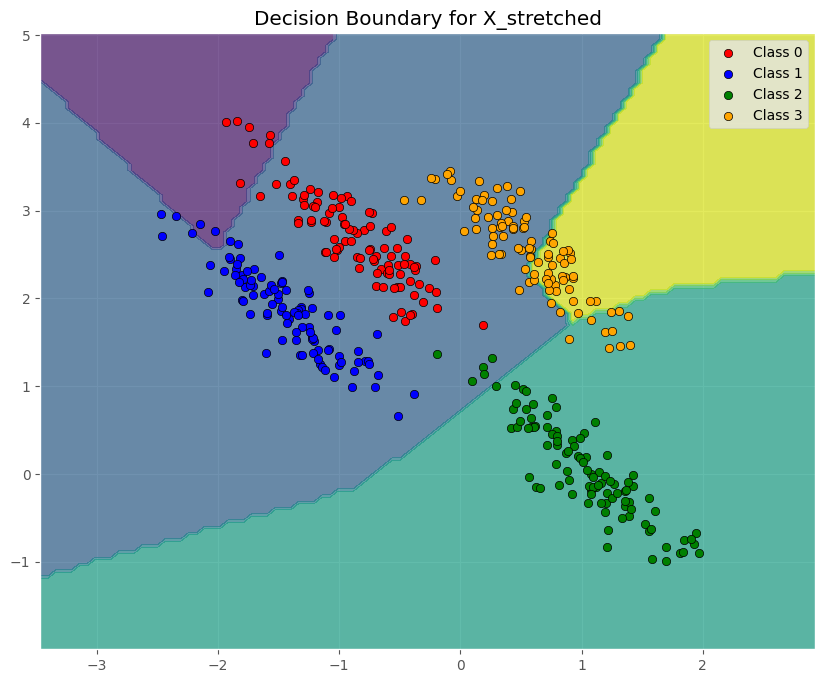

In [38]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched")
plt.show()

Розрахунок критеріїв якості:

In [39]:
metrics.confusion_matrix(test_labels_stretched, model.predict(test_data_stretched))

array([[ 2, 17,  0,  0],
       [ 0, 21,  0,  0],
       [ 0,  0, 23,  0],
       [ 0, 10,  3,  4]])

In [40]:
metrics.precision_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([1.        , 0.4375    , 0.88461538, 1.        ])

In [41]:
metrics.recall_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.10526316, 1.        , 1.        , 0.23529412])

In [42]:
metrics.f1_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.19047619, 0.60869565, 0.93877551, 0.38095238])

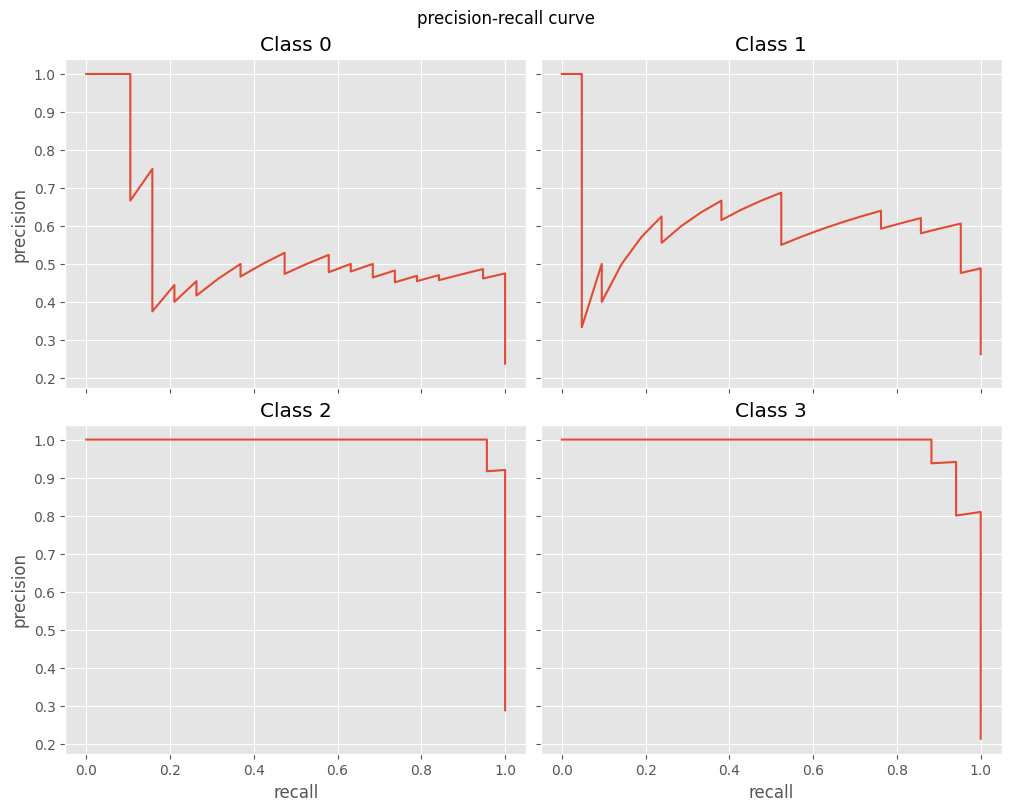

In [43]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

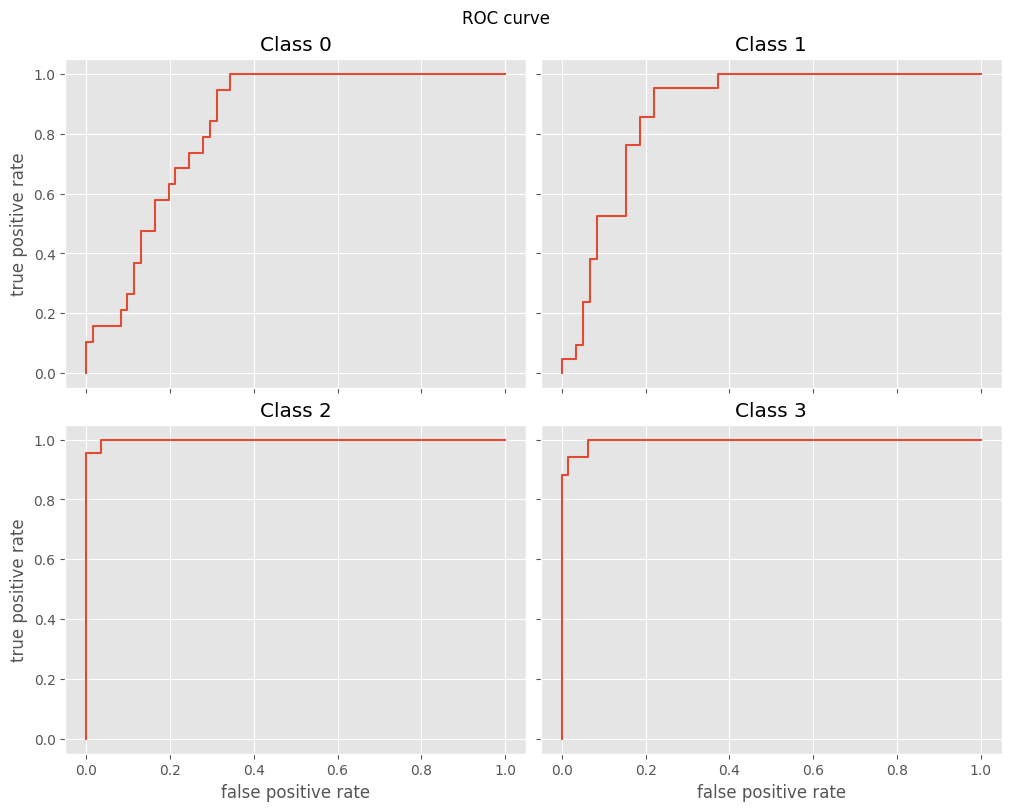

In [44]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [45]:
metrics.roc_auc_score(test_labels_stretched, model.predict_proba(test_data_stretched), multi_class='ovr', average=None)

array([0.8308887 , 0.87651332, 0.99847445, 0.99533147])

Решітчастий пошук для підбору гіперпараметрів:

In [46]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001), 'activation': ("identity", "logistic", "tanh", "relu"), 'solver': ("lbfgs", "sgd", "adam")}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_stretched, train_labels_stretched)
grid_search.best_estimator_

MLPClassifier(activation='identity', alpha=0.1, hidden_layer_sizes=7,
              solver='lbfgs')

Навчання моделі на підмножині навчальних даних

In [47]:
model.fit(train_data_stretched[:20], train_labels_stretched[:20])
model.predict(test_data_stretched)

array([1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 2, 3, 1, 0, 1, 2, 3, 3, 2, 1,
       3, 1, 2, 3, 3, 3, 2, 0, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 3, 1, 1, 3, 0, 2, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 1, 3, 3, 2, 2, 1])

In [48]:
test_labels_stretched

array([0, 1, 2, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2, 3, 0, 1, 1, 2, 3, 3, 2, 0,
       3, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2,
       2, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 1, 3, 0, 1, 2, 1, 0, 3, 0, 0, 0,
       1, 2, 2, 0, 1, 1, 1, 2, 1, 3, 3, 2, 2, 0])

In [49]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 56 прикладів з 80


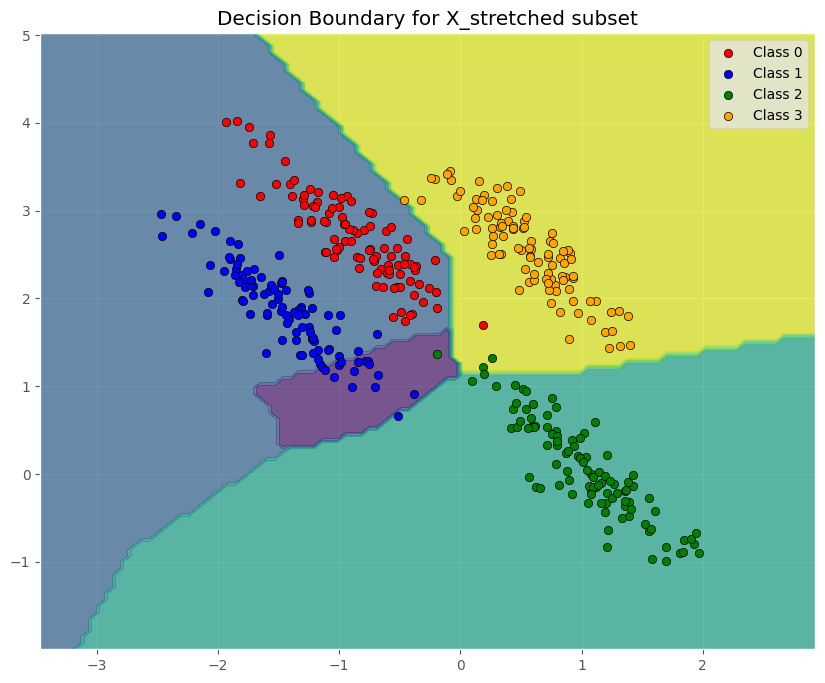

In [50]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched subset")
plt.show()

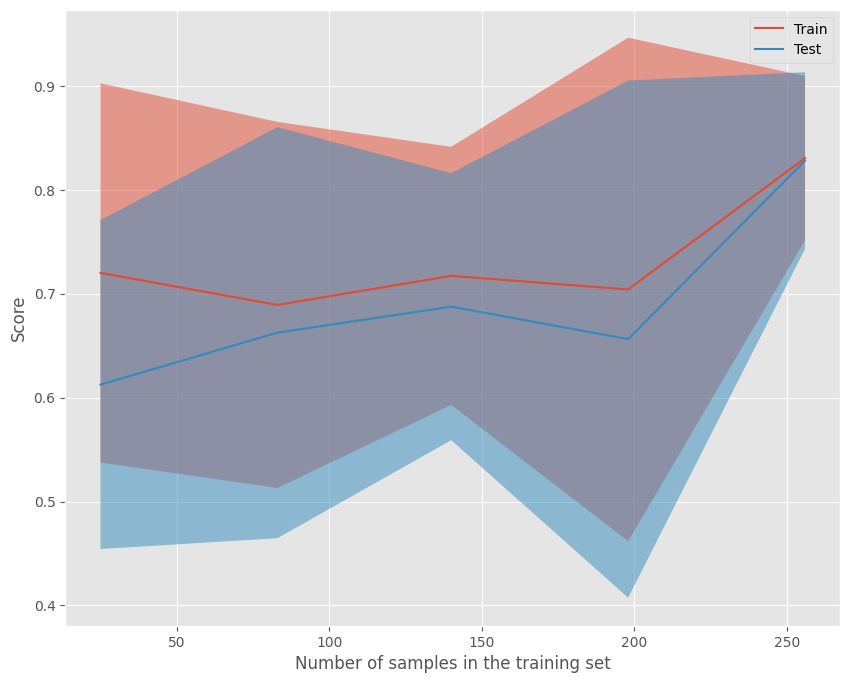

In [51]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_stretched, train_labels_stretched)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить не дуже суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині не є гарною моделлю. 

Побудова моделі 3 для даних Х_stretched з пошуком оптимального hidden_layer_sizes

In [52]:
i = 1
model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
model.fit(train_data_stretched, train_labels_stretched)
while i <= 100 and model.score(test_data_stretched, test_labels_stretched) < 0.9:
    model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
    model.fit(train_data_stretched, train_labels_stretched)
    i += 1

In [53]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 7,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [54]:
model.predict(test_data_stretched)

array([0, 1, 2, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2, 3, 1, 1, 1, 2, 3, 3, 2, 0,
       3, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2,
       2, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 1, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0,
       1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 3, 2, 2, 0])

In [55]:
test_labels_stretched

array([0, 1, 2, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2, 3, 0, 1, 1, 2, 3, 3, 2, 0,
       3, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2,
       2, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 1, 3, 0, 1, 2, 1, 0, 3, 0, 0, 0,
       1, 2, 2, 0, 1, 1, 1, 2, 1, 3, 3, 2, 2, 0])

In [56]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 77 прикладів з 80


Перенавчання відсутнє

Імовірності потрапляння в кожен з класів:

In [57]:
model.predict_proba(test_data_stretched)

array([[4.95544839e-01, 2.14275575e-01, 1.14396037e-02, 2.78739983e-01],
       [3.89330583e-01, 5.89411480e-01, 2.66334127e-03, 1.85945954e-02],
       [1.77324093e-01, 1.51012197e-01, 4.90049049e-01, 1.81614661e-01],
       [4.92112066e-01, 2.73130118e-01, 3.06606334e-02, 2.04097183e-01],
       [1.17574391e-01, 1.84989777e-02, 1.09387465e-01, 7.54539166e-01],
       [4.37837147e-01, 5.06345068e-01, 1.28069698e-02, 4.30108158e-02],
       [1.39537868e-01, 1.98156545e-02, 2.17407031e-02, 8.18905775e-01],
       [5.20517740e-01, 3.64039106e-01, 6.24253133e-03, 1.09200623e-01],
       [1.17830113e-01, 1.48902573e-02, 1.73960851e-02, 8.49883545e-01],
       [5.02581165e-01, 3.19756188e-01, 2.30578982e-02, 1.54604749e-01],
       [5.31367992e-01, 3.52624107e-01, 3.61150421e-03, 1.12396397e-01],
       [1.67972839e-01, 1.21754629e-01, 5.03365158e-01, 2.06907374e-01],
       [1.56639021e-01, 8.71735534e-02, 5.31245105e-01, 2.24942320e-01],
       [2.97734662e-01, 6.30928155e-02, 7.59788944e

Границі рішень:

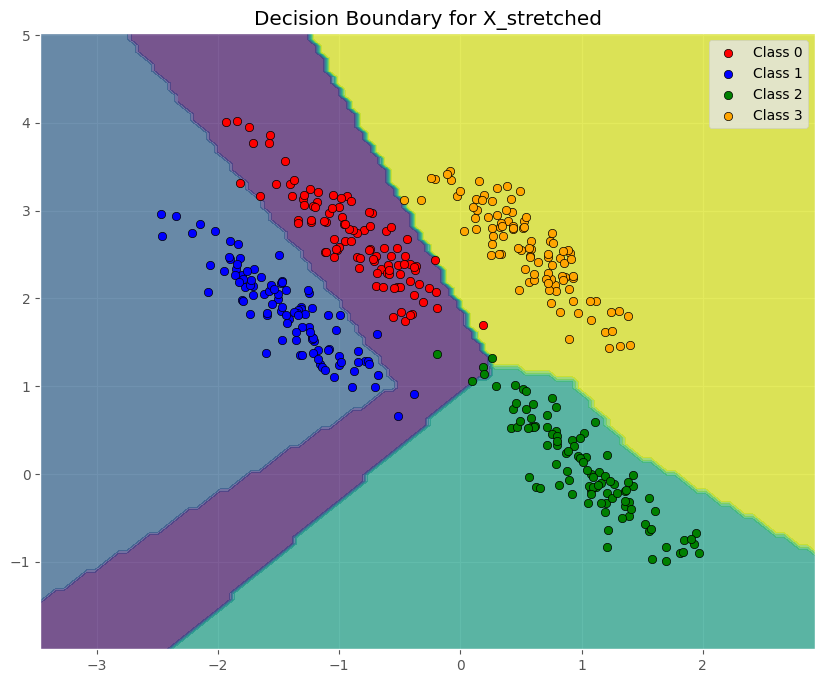

In [58]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched")
plt.show()

Розрахунок критеріїв якості:

In [59]:
metrics.confusion_matrix(test_labels_stretched, model.predict(test_data_stretched))

array([[17,  1,  0,  1],
       [ 1, 20,  0,  0],
       [ 0,  0, 23,  0],
       [ 0,  0,  0, 17]])

In [60]:
metrics.precision_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.94444444, 0.95238095, 1.        , 0.94444444])

In [61]:
metrics.recall_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.89473684, 0.95238095, 1.        , 1.        ])

In [62]:
metrics.f1_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.91891892, 0.95238095, 1.        , 0.97142857])

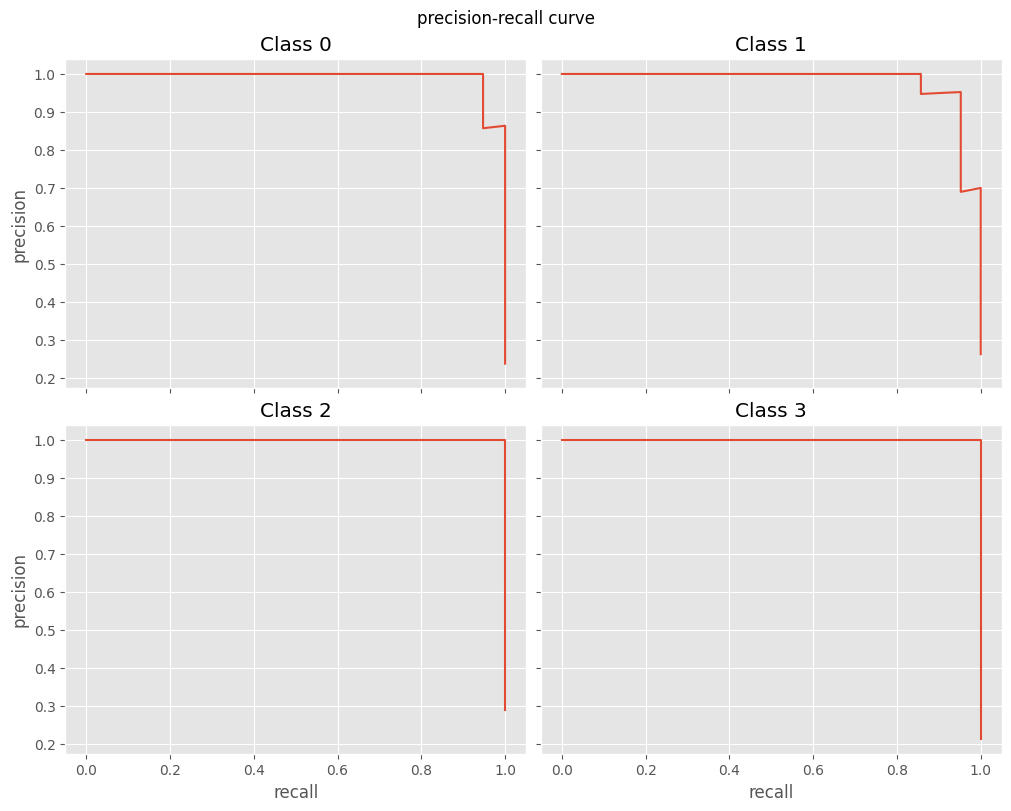

In [63]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

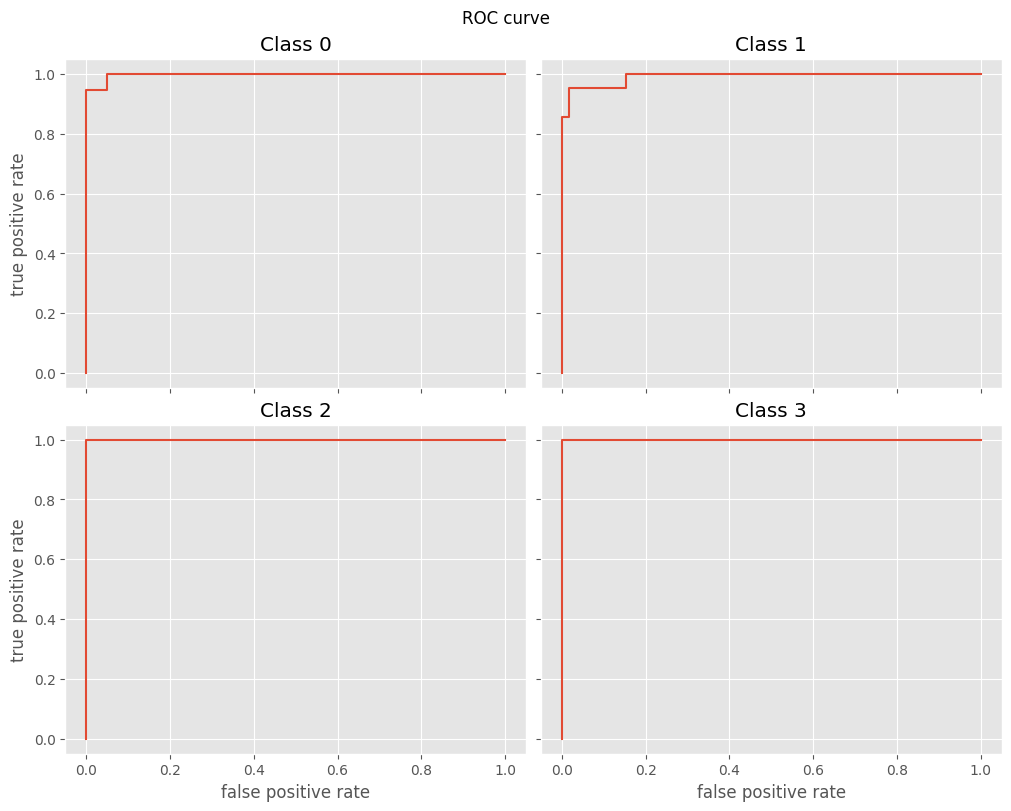

In [64]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [65]:
metrics.roc_auc_score(test_labels_stretched, model.predict_proba(test_data_stretched), multi_class='ovr', average=None)

array([0.99741156, 0.99112187, 1.        , 1.        ])

Решітчастий пошук для підбору гіперпараметрів:

In [66]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001), 'activation': ("identity", "logistic", "tanh", "relu"), 'solver': ("lbfgs", "sgd", "adam")}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_stretched, train_labels_stretched)
grid_search.best_estimator_

MLPClassifier(activation='identity', alpha=0.1, hidden_layer_sizes=7,
              solver='lbfgs')

Навчання моделі на підмножині навчальних даних

In [67]:
model.fit(train_data_stretched[:20], train_labels_stretched[:20])
model.predict(test_data_stretched)

array([1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 3, 3, 3, 1,
       3, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2,
       3, 3, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 3, 2, 2, 1])

In [68]:
test_labels_stretched

array([0, 1, 2, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2, 3, 0, 1, 1, 2, 3, 3, 2, 0,
       3, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2,
       2, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 1, 3, 0, 1, 2, 1, 0, 3, 0, 0, 0,
       1, 2, 2, 0, 1, 1, 1, 2, 1, 3, 3, 2, 2, 0])

In [69]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 57 прикладів з 80


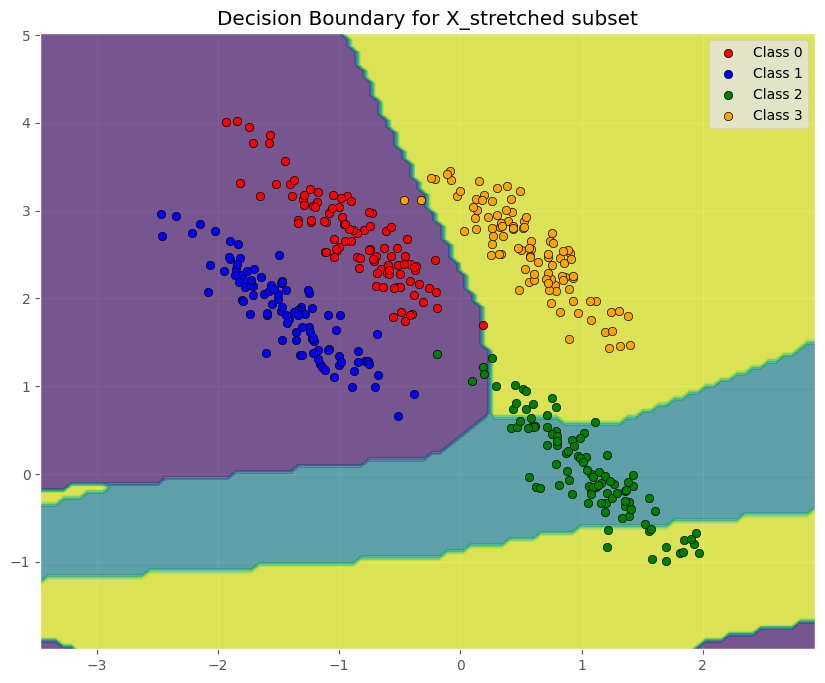

In [70]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched subset")
plt.show()

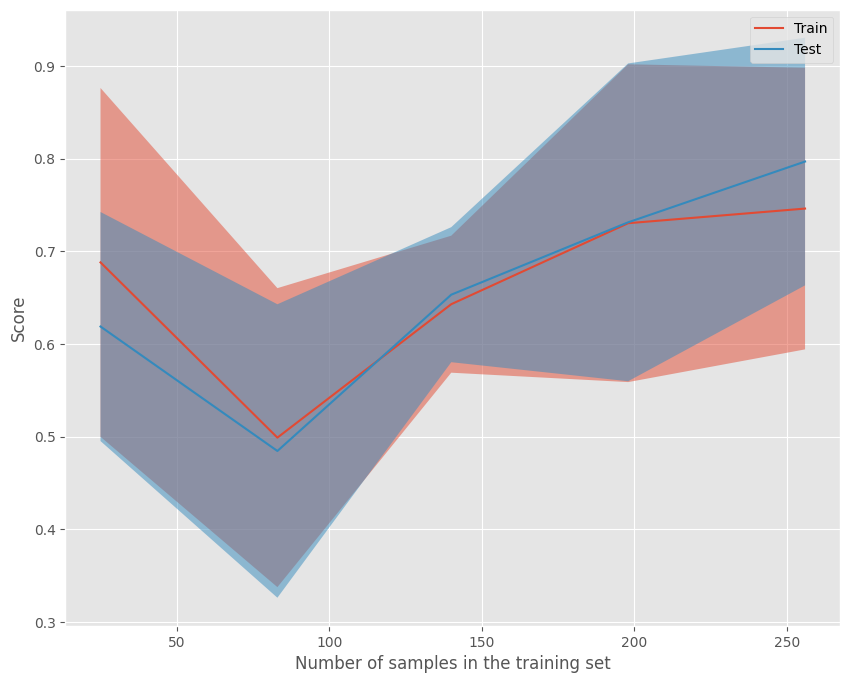

In [71]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_stretched, train_labels_stretched)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є прийнятною. 

### Набір даних (б)

In [72]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

Візуалізація даних

In [73]:
np.unique(Y)

array([False,  True])

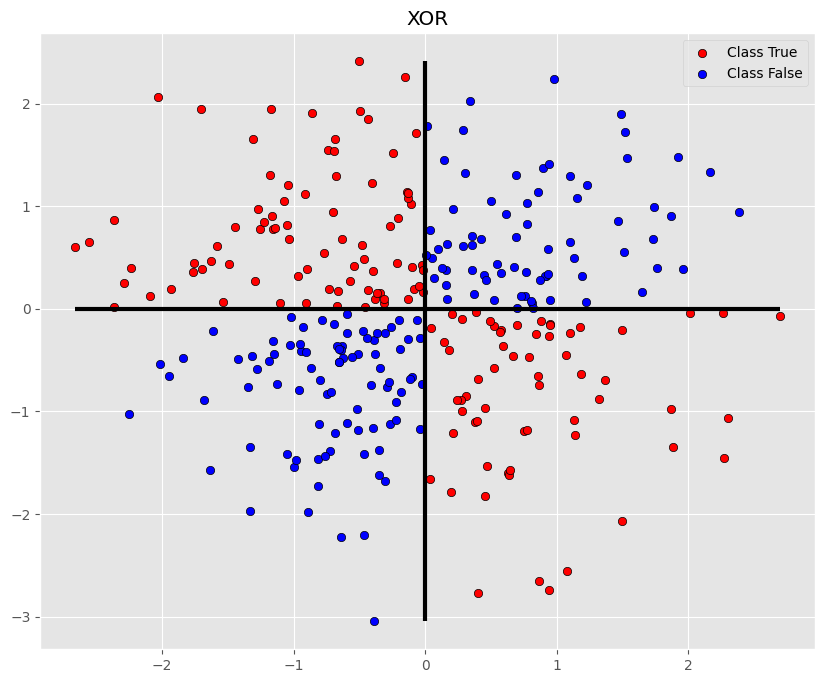

In [74]:
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.vlines(0, ymin=X[:, 1].min(), ymax=X[:, 1].max(), linewidth=3, colors='black')
plt.hlines(0, xmin=X[:, 0].min(), xmax=X[:, 0].max(), linewidth=3, colors='black')
plt.legend()
plt.title("XOR")
plt.show()

Розбиття даних на навчальний та тестовий набори

In [75]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, Y, test_size=0.2)

In [76]:
train_data.shape

(240, 2)

In [77]:
test_data.shape

(60, 2)

In [78]:
train_labels.shape

(240,)

In [79]:
test_labels.shape

(60,)

In [80]:
i = 1
model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
model.fit(train_data, train_labels)
while i <= 100 and model.score(test_data, test_labels) < 0.9:
    model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
    model.fit(train_data, train_labels)
    i += 1

In [81]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [82]:
model.predict(test_data)

array([ True,  True, False, False,  True, False,  True, False,  True,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

In [83]:
test_labels

array([ True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True])

In [84]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 47 прикладів з 60


Імовірності потрапляння в кожен з класів:

In [85]:
model.predict_proba(test_data)

array([[0.48658178, 0.51341822],
       [0.49077209, 0.50922791],
       [0.62069416, 0.37930584],
       [0.53881725, 0.46118275],
       [0.46736905, 0.53263095],
       [0.53161331, 0.46838669],
       [0.38121684, 0.61878316],
       [0.75782483, 0.24217517],
       [0.48580855, 0.51419145],
       [0.54947417, 0.45052583],
       [0.47472201, 0.52527799],
       [0.50997772, 0.49002228],
       [0.55929427, 0.44070573],
       [0.44852455, 0.55147545],
       [0.51272267, 0.48727733],
       [0.4453938 , 0.5546062 ],
       [0.64201815, 0.35798185],
       [0.50364068, 0.49635932],
       [0.62848652, 0.37151348],
       [0.48426811, 0.51573189],
       [0.52465273, 0.47534727],
       [0.60307041, 0.39692959],
       [0.595094  , 0.404906  ],
       [0.40801515, 0.59198485],
       [0.64221098, 0.35778902],
       [0.52361094, 0.47638906],
       [0.53469835, 0.46530165],
       [0.61193394, 0.38806606],
       [0.51925147, 0.48074853],
       [0.53462256, 0.46537744],
       [0.

Границі рішень:

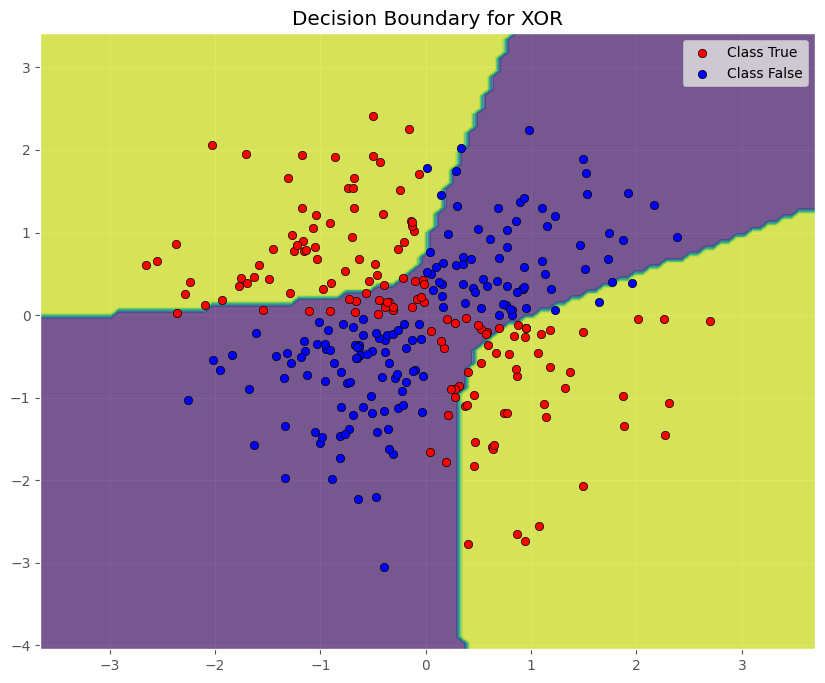

In [86]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR")
plt.show()

Розрахунок критеріїв якості:

In [87]:
metrics.confusion_matrix(test_labels, model.predict(test_data))

array([[30,  1],
       [12, 17]])

In [88]:
metrics.precision_score(test_labels, model.predict(test_data))

0.9444444444444444

In [89]:
metrics.recall_score(test_labels, model.predict(test_data))

0.5862068965517241

In [90]:
metrics.f1_score(test_labels, model.predict(test_data))

0.7234042553191489

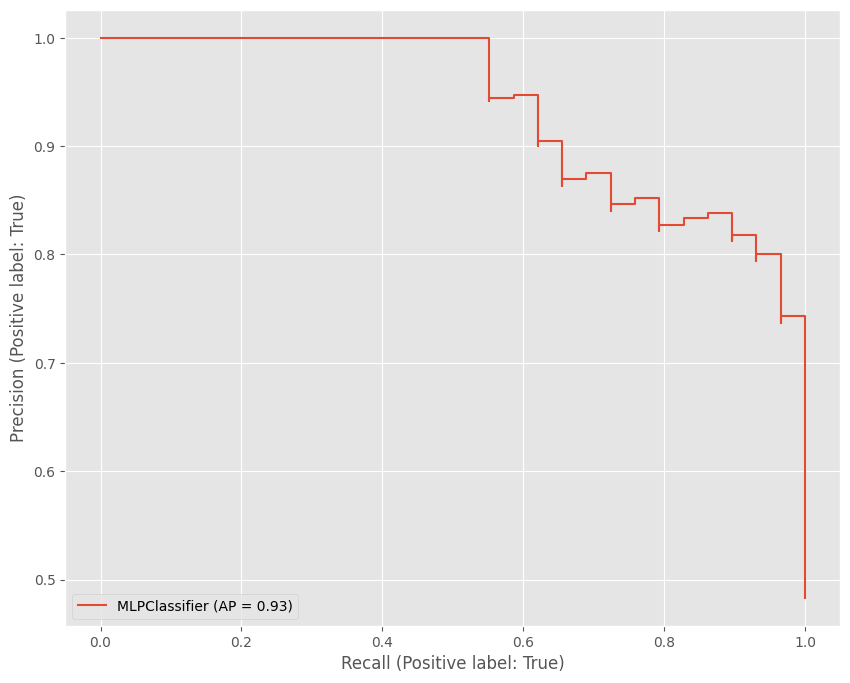

In [91]:
metrics.PrecisionRecallDisplay.from_estimator(model, test_data, test_labels)
plt.show()

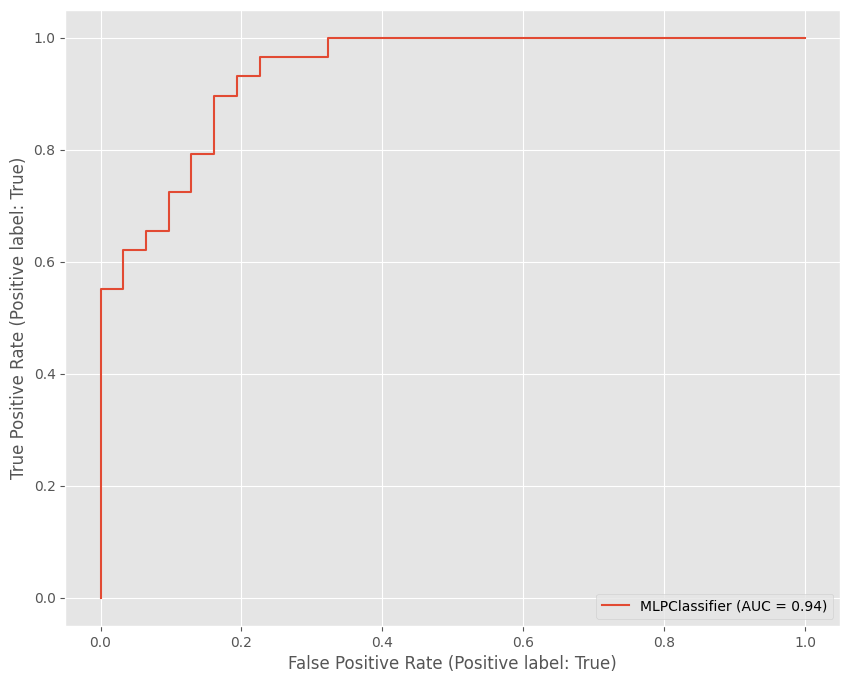

In [92]:
metrics.RocCurveDisplay.from_estimator(model, test_data, test_labels)
plt.show()

In [93]:
metrics.roc_auc_score(test_labels, model.predict(test_data))

0.7769744160177976

Решітчастий пошук для підбору гіперпараметрів:

In [94]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001), 'activation': ("identity", "logistic", "tanh", "relu"), 'solver': ("lbfgs", "sgd", "adam")}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data, train_labels)
grid_search.best_estimator_

MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=100,
              solver='lbfgs')

Навчання моделі на підмножині навчальних даних

In [95]:
model.fit(train_data[:20], train_labels[:20])
model.predict(test_data)

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [96]:
test_labels

array([ True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True])

In [97]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 41 прикладів з 60


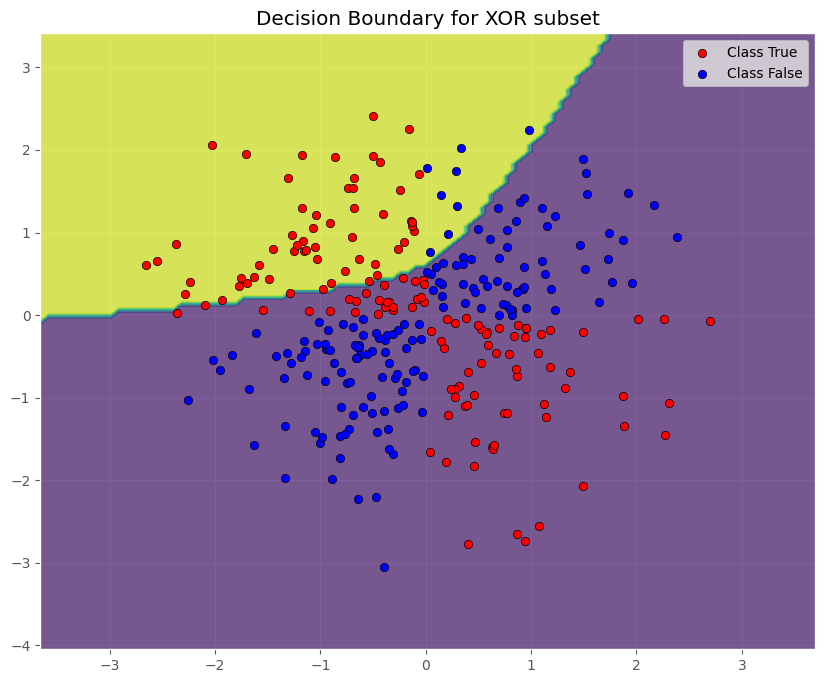

In [98]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR subset")
plt.show()

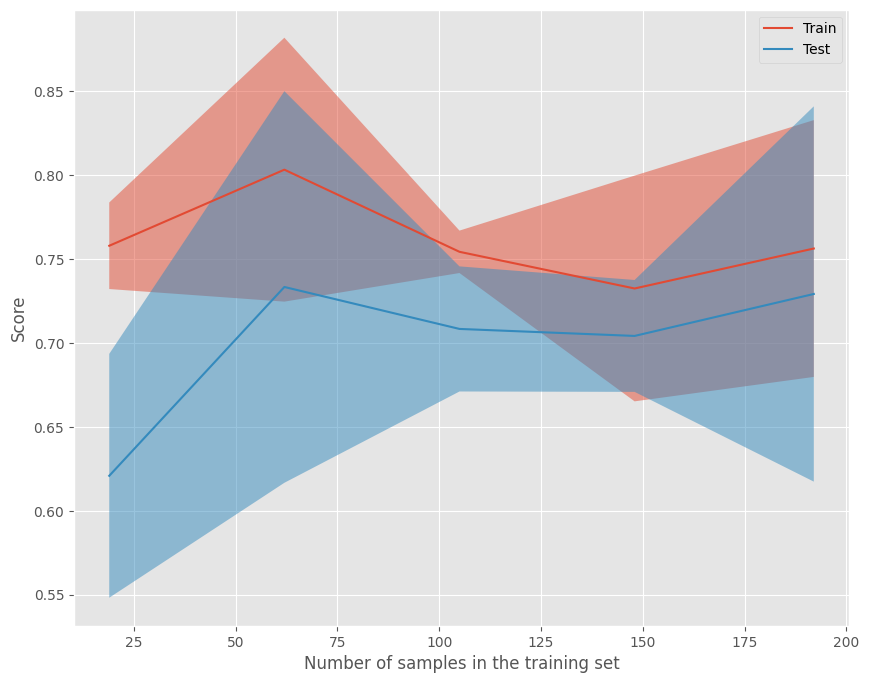

In [99]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data, train_labels)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є прийнятною. 